In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df1 = pd.DataFrame.from_csv("CME FUTURE JAN 18.csv")
df2 = pd.DataFrame.from_csv("BTC INTRADAY.csv")


In [3]:
df1 = df1.rename( columns={'Open':'FUT Open', 'High':'FUT High','Low':'FUT Low', 'Close':'FUT Close'})

In [4]:
df2.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,
2018-01-01 23:40:00,13446.51,13490.61,13380,13431,38.09,510576.46,13404.9
2018-01-01 23:45:00,13431.03,13468.72,13381.13,13419.38,11.27,151171.61,13413.61
2018-01-01 23:50:00,13419.38,13445,13380.93,13445,40.3,540876.56,13420.02
2018-01-01 23:55:00,13444.99,13451.86,13372.33,13443.41,39.95,535412.5,13402.3
2018-01-02 00:00:00,13394.2,13544.53,13394.2,13517.37,35.54,479137.21,13480.15


In [5]:
df3 = df1.join(df2)

In [6]:
df3 = df3.dropna()

In [107]:
df3.tail()

,FUT Open,FUT High,FUT Low,FUT Close,SMAVG (5) on Close,SMAVG (10) on Close,SMAVG (15) on Close,Volume,SMAVG (5),Open,...,Volume (Currency),Weighted Price,Risk Free Rate,Implied Risk Free Rate,Hull Implied Risk Free Rate,ADj_Close,ADJ_Implied Risk Free Rate,ADJ_Hull Implied Risk Free Rate,Filtered Close,Filtered_Hull Implied Risk Free Rate
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 18:20:00,13560,13560,13560,13560,13657,14057,14210,1,2,13098.91,...,419446.07,13282.86,0.013525,-0.012719,-0.026018,13360.768625,-0.001366,0.002083,13434.473204,0.001274
2018-01-01 18:15:00,13580,13580,13580,13580,13839,14153,14277,2,2,13114.68,...,31531.5,13148.47,0.013525,-0.031125,-0.059229,13131.015675,-0.019984,0.004850,13427.126659,0.001571
2018-01-01 18:10:00,13690,13690,13570,13570,13995,14243,14344,7,2,13150.4,...,20491.05,13116.5,0.013525,-0.026178,-0.050241,13188.348650,-0.014980,0.004101,13421.473505,0.001525
2018-01-01 18:05:00,13620,13620,13620,13620,14161,14338,14416,1,3,13138.27,...,60444.92,13164.18,0.013525,-0.030125,-0.057409,13183.286025,-0.018973,0.004699,13415.955662,0.002126
2018-01-01 18:00:00,13955,13955,13955,13955,14335,14424,14484,1,3,13063.5,...,151367.39,13076.27,0.013525,-0.053435,-0.100340,13182.905075,-0.042551,0.008276,13410.670154,0.005757


In [8]:
x = df3.index
y1 = df3['Close']
y2 = df3['FUT Close']

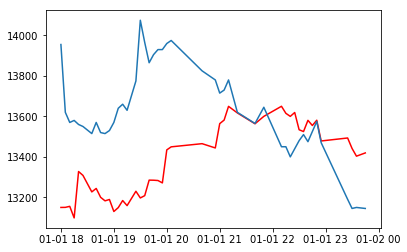

In [59]:
#BTC is red future is blue
plt.plot(y1, label='BTC', c='r')

plt.plot(y2)



In [10]:
df4 = pd.DataFrame.from_csv('Risk Free Rate.csv')
df4.head()

,Last Price
Date,
2018-01-02 13:30:00,1.3825
2018-01-02 13:25:00,1.3825
2018-01-02 13:20:00,1.3825
2018-01-02 13:15:00,1.3825
2018-01-02 13:10:00,1.3825


In [11]:
df4 = df4.rename(columns={'Last Price':'Risk Free Rate'})

In [23]:
df3['Risk Free Rate'] = .013525

In [40]:
df3['ADJ_Implied Risk Free Rate'] = (1+df3['Risk Free Rate'])*(df3['ADj_Close'].astype(float) / df3['FUT Close']) - 1

In [185]:
df3['ADJ_Hull Implied Risk Free Rate'] = (np.log(df3['FUT Close']/df3['ADj_Close'].astype(float)))/(17.0/(30.0*12))

In [186]:
df3['ADJ_Hull Implied Risk Free Rate'].describe()

count    46.000000
mean      0.319616
std       0.507845
min      -0.534166
25%      -0.073839
50%       0.428842
75%       0.708498
max       1.311243
Name: ADJ_Hull Implied Risk Free Rate, dtype: float64

In [25]:
fees =  1.0025

In [36]:
df3['Close'] = df3['Close'].astype(float)

In [38]:
df3['ADj_Close'] = df3['Close']*fees

In [106]:
df3['ADJ_Hull Implied Risk Free Rate'].describe()

count    46.000000
mean      0.002126
std       0.003527
min      -0.003803
25%      -0.000607
50%       0.002884
75%       0.004826
max       0.009012
Name: ADJ_Hull Implied Risk Free Rate, dtype: float64

In [96]:
df3['ADJ_Implied Risk Free Rate'].describe()

count    46.000000
mean     -0.001376
std       0.023962
min      -0.047329
25%      -0.019823
50%      -0.006793
75%       0.017065
max       0.039416
Name: ADJ_Implied Risk Free Rate, dtype: float64

In [132]:
n_inter = 46
sz = (n_inter,)
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor
R=.5**2
xhat[0] = 13400.0
P[0] = 1.0
Q = 1e-5


In [133]:
for k in range(1,n_inter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(df3['ADj_Close'][k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

In [134]:
df3['Filtered Close']= xhat

array([ 13400.        ,  13429.49477899,  13449.78829678,  13473.53016705,
        13482.62954589,  13507.83496852,  13520.80377742,  13533.72239945,
        13536.76590142,  13540.11602157,  13551.161659  ,  13558.53498819,
        13565.93596337,  13574.86763269,  13579.03228296,  13580.23671659,
        13584.60917664,  13590.36938178,  13591.76215939,  13592.08821481,
        13586.40634621,  13582.25981341,  13577.77548142,  13573.02239991,
        13561.86535222,  13552.0618137 ,  13543.06039511,  13534.73200465,
        13524.2437897 ,  13514.07246581,  13505.67866867,  13495.51510062,
        13486.76663322,  13477.47304021,  13468.14922573,  13461.06544427,
        13454.17996194,  13448.1399191 ,  13443.58211556,  13438.81119004,
        13436.34524541,  13434.47320438,  13427.12665896,  13421.47350518,
        13415.95566247,  13410.67015413])

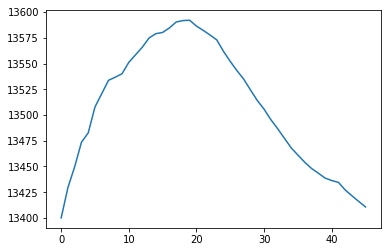

In [135]:
plt.plot(xhat)

In [112]:
df3.head()

,FUT Open,FUT High,FUT Low,FUT Close,SMAVG (5) on Close,SMAVG (10) on Close,SMAVG (15) on Close,Volume,SMAVG (5),Open,...,Volume (Currency),Weighted Price,Risk Free Rate,Implied Risk Free Rate,Hull Implied Risk Free Rate,ADj_Close,ADJ_Implied Risk Free Rate,ADJ_Hull Implied Risk Free Rate,Filtered Close,Filtered_Hull Implied Risk Free Rate
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 23:45:00,13145,13145,13145,13145,13220,13367,13403,1,6,13431.03,...,151171.61,13413.61,0.013525,0.025476,0.040964,13452.928450,0.037267,-0.003499,13400.000000,-0.002825
2018-01-01 23:35:00,13155,13155,13150,13150,13306,13396,13431,4,6,13424.29,...,205954.16,13423.93,0.013525,0.023862,0.038185,13436.868400,0.035635,-0.003268,13429.494779,-0.003093
2018-01-01 23:30:00,13080,13145,13080,13145,13381,13421,13463,5,6,13500,...,380223.05,13480.12,0.013525,0.027170,0.043878,13475.153875,0.038981,-0.003742,13449.788297,-0.003371
2018-01-01 23:25:00,13515,13515,13190,13190,13447,13452,13505,19,5,13441.45,...,207672.25,13453.52,0.013525,0.027600,0.044616,13526.943025,0.039416,-0.003803,13473.530167,-0.003128
2018-01-01 22:55:00,13470,13470,13470,13470,13511,13478,13541,1,2,13548.54,...,360245.35,13533.2,0.013525,0.005142,0.005622,13512.196250,0.016700,-0.000554,13482.629546,-0.000138


In [178]:
#solving for r using F(0) = S(0)e^(rt) and a kalman filtered underlying
df3['Filtered_Hull Implied Risk Free Rate'] = (360.0)*(np.log(df3['FUT Close']/df3['Filtered Close'].astype(float)))/17.0

In [179]:
#Mean is the average implied risk free rate when looking using a price of BTC that has been filtered to reduce noise
df3['Filtered_Hull Implied Risk Free Rate'].describe()

count    46.000000
mean      0.167460
std       0.324791
min      -0.485405
25%      -0.022791
50%       0.184505
75%       0.314641
max       0.861218
Name: Filtered_Hull Implied Risk Free Rate, dtype: float64

In [151]:
#this is a conservative estimate of the risk free rate using 3 month bill
.0131525

0.0131525

In [156]:
#Estimate using 10 year T-bill
.0242

0.0242

In [191]:
df3['Theoretical Price'] = df3['Filtered Close']*np.exp(.013125*17/30)

In [193]:
(df3['Theoretical Price']-df3['FUT Close']).describe()

count     46.000000
mean      -8.103969
std      208.713730
min     -460.041917
25%     -100.960400
50%      -17.396576
75%      115.782307
max      405.194018
dtype: float64

In [189]:
#Null is that Mean = 0 at .05 signifigance not able to reject Null P-Value is .9442
100.576982/208.774970/np.sqrt(46)

0.071029908279885645

In [242]:
(0.167460-.0131525)/0.324791/np.sqrt(46)

0.070049353736315934

In [307]:
k = np.cumprod(1+np.random.randn(1000000,28)*2.52/np.sqrt(28),1)*16518.75221

In [308]:
k.mean()

16626.796486381376